<a href="https://colab.research.google.com/github/srtaksande/MachineLearning/blob/main/EDA_for_Election_Dataset_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Submitted by: Taksande Sandeep Ravindra


## Importing Files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/Sandeep/OneDrive/Desktop/Extra/candidate.csv")
df.head()

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5


## Changing Column Names

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")
df.columns

Index(['st_code', 'state_name', 'month', 'year', 'pc_number', 'pc_name',
       'pc_type', 'candidate_name', 'candidate_sex', 'candidate_category',
       'candidate_age', 'party_abbreviation', 'total_votes_polled',
       'position'],
      dtype='object')

### Elections are the means by which citizens can express their political views. They express their views by voting for a political leader in a public election. Furthermore, this political figure would be in a position of power and responsibility. Election, in particular, is a formal collective decision-making process. In addition, the chosen political leader would be a public figure.
### The election is unquestionably an important aspect of democracy. This is due to the fact that elections assure that the government is of, by, and for the people.


## Total Number of Votes and votes Not Applicable

In [ ]:
print("Total Votes:", sum(df.total_votes_polled),'\n')
print("Total Votes NOT APPLICABLE:", len(df.total_votes_polled == 'NA'))

Total Votes: 553802946 

Total Votes NOT APPLICABLE: 8794


C:\Users\Sandeep\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


### It can be observed that the total votes polled are 553802946 out of which 8794 votes are Not Applicable

## Percentage of Female, Male and Other Candidates

In [ ]:
print("Percentage of Female Candidates:",len(df[df.candidate_sex == 'F'])*100/len(df),'\n')
print("Percentage of Male Candidates:",len(df[df.candidate_sex == 'M'])*100/len(df),'\n')
print("Percentage of Other Candidates:",len(df[df.candidate_sex == 'O'])*100/len(df))

Percentage of Female Candidates: 7.59608824198317 

Percentage of Male Candidates: 86.17239026609052 

Percentage of Other Candidates: 0.06822833750284285


### The percentage of Male Candidates are observed to be maximum i.e. 86.17239026609052 %

## Percentage of SC, ST and General Category Candidates

In [ ]:
print("Percentage of SC Category Candidates:",len(df[df.candidate_category == 'SC'])*100/len(df),'\n')
print("Percentage of ST Category Candidates:",len(df[df.candidate_category == 'ST'])*100/len(df),'\n')
print("Percentage of General Category Candidates:",len(df[df.candidate_category == 'GEN'])*100/len(df))
# print("Percentage of NULL Category Candidates:",len(df[df.candidate_category == 'NULL'])*100/len(df),'\n')

Percentage of SC Category Candidates: 23.857175346827383 

Percentage of ST Category Candidates: 7.061632931544235 

Percentage of General Category Candidates: 62.90652717762111


Text(0.5, 1.0, 'Category Count')

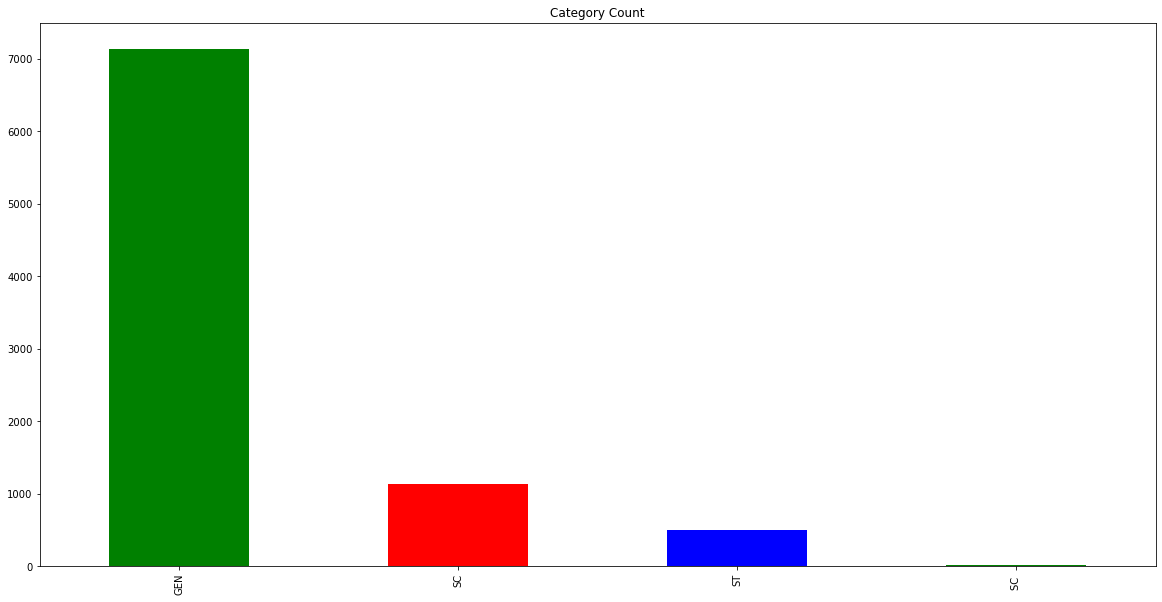

In [ ]:
category = df.pc_type.value_counts()
#print('Category Count: \n',category)
category.plot(kind='bar',figsize=(20,10), color=['green','red','blue'])
plt.title('Category Count')

### The percentage of SC, ST and General Categories are observed to be 23.85%, 7.06% and 62.92% respectively

## Count and Percentage of Independent, INC and BJP members

In [ ]:
print("Count of Independent Members :", sum(df.party_abbreviation == 'IND'),'\n')
print("Percentage of Independent Candidates:",len(df[df.party_abbreviation == 'IND'])*100/len(df),'\n')
print("Count of Members belonging to INC Party:", sum(df.party_abbreviation == 'INC'),'\n')
print("Percentage of INC Candidates:",len(df[df.party_abbreviation == 'INC'])*100/len(df),'\n')
print("Count of Members belonging to BJP Party:", sum(df.party_abbreviation == 'BJP'),'\n')
print("Percentage of BJP Candidates:",len(df[df.party_abbreviation == 'BJP'])*100/len(df))

Count of Independent Members : 3234 

Percentage of Independent Candidates: 36.7750739140323 

Count of Members belonging to INC Party: 464 

Percentage of INC Candidates: 5.276324766886513 

Count of Members belonging to BJP Party: 428 

Percentage of BJP Candidates: 4.866954741869456


### The percentage of Independent candidates is found to be maximum followed by members belonging to INC and BJP

###### *Assuming INC and BJP to be bigger parties, other parties have not been considered

In [ ]:
#print(df.groupby(["party_abbreviation"])[['position']].count())
df[(df.party_abbreviation=='IND')&(df.position == "1")].count().sum()

0

### Even though the percentage of Inependent Candidates are maximum, they were unable to get the First Position in any of the Constituencies

## Group by State Name and Category

In [ ]:
print(df.groupby(["state_name"])[['candidate_category']].count().sample(10),'\n\n')
print('Sum of all the Candidate Categories:', df.groupby(["state_name"])[['candidate_category']].count().sum(),'\n\n')
df.sample(6)

                           candidate_category
state_name                                   
Lakshadweep                                 6
Tamil Nadu                                846
Karnataka                                 434
Sikkim                                      6
Bihar                                     607
Arunachal Pradesh                          11
Andaman & Nicobar Islands                  15
Uttar Pradesh                            1288
Dadra & Nagar Haveli                       11
Odisha                                    196 


Sum of all the Candidate Categories: candidate_category    8252
dtype: int64 




,st_code,state_name,month,year,pc_number,pc_name,pc_type,candidate_name,candidate_sex,candidate_category,candidate_age,party_abbreviation,total_votes_polled,position
8495,S28,Uttarakhand,5,2014,2,Garhwal,GEN,RENU AGARWAL,F,GEN,36.0,IND,3051,10
3869,S13,Maharashtra,5,2014,25,Thane,GEN,SALMAN AJIMULLAH HASMI,M,GEN,28.0,RAPa,1402,16
5866,S22,Tamil Nadu,5,2014,31,Sivaganga,GEN,SARAVANAN M,M,GEN,39.0,IND,2100,14
3846,S13,Maharashtra,5,2014,24,Kalyan,GEN,TELGOTE PRAKASH SHAMRAO,M,GEN,43.0,IND,1600,12
6271,S24,Uttar Pradesh,5,2014,11,Baghpat,GEN,RUKSANA,F,GEN,28.0,IND,2092,10
3820,S13,Maharashtra,5,2014,22,Palghar,ST,KASHINATH LAXMAN KOKERA,M,ST,37.0,IND,4327,11


### Group by State Code and Parliamentary Constituency

In [ ]:
print(df.groupby(["st_code"])[['pc_type']].count().sample(10), '\n\n')
print('Sum of all the State Code Types:',(df.groupby(["st_code"])[['pc_type']].count().sum()))


         pc_type
st_code         
S22          884
S28           79
U02           18
U05          157
S09           83
S14           20
S03          176
S15           12
S12          407
S20          345 


Sum of all the State Code Types: pc_type    8794
dtype: int64


## Leading Candidates in their respective Parliamentary Constituencies

In [ ]:
df[df.position==1]
df.sample(6)

,st_code,state_name,month,year,pc_number,pc_name,pc_type,candidate_name,candidate_sex,candidate_category,candidate_age,party_abbreviation,total_votes_polled,position
304,S01,Andhra Pradesh,5,2014,19,Srikakulam,GEN,KINJARAPU TEJESWARA RAO,M,GEN,31.0,IND,2075,11
5971,S22,Tamil Nadu,5,2014,35,Ramanathapuram,GEN,None of the Above,NaN,GEN,57.0,NOTA,6279,8
3222,S12,Madhya Pradesh,5,2014,18,VIDISHA,GEN,ENGINEEAR BHAGWAT SINGH RAJPUT,M,GEN,57.0,AAAP,5204,7
1030,S04,Bihar,5,2014,13,Madhepura,GEN,SAJAN KUMAR JHA,M,GEN,42.0,JMBP,4396,12
5133,S20,Rajasthan,5,2014,21,Chittorgarh,GEN,CHANDRA PRAKASH JOSHI,M,GEN,38.0,BJP,703236,1
6866,S24,Uttar Pradesh,5,2014,46,Jhansi,GEN,UMA BHARATI,F,GEN,55.0,BJP,575889,1


### Above is the list of some candidates receiving first position (highest votes received) in their respective Parliamentary Constituencies

In [ ]:
print(df.loc[df.total_votes_polled == max(df.total_votes_polled)], '\n\n\n')
print('Maximum number of votes received by a candidate:', max(df.total_votes_polled), '\n\n\n')
print(df.loc[df.total_votes_polled == min(df.total_votes_polled)], '\n\n\n')
print('Minimum number of votes received by a candidate:', min(df.total_votes_polled))

     st_code state_name  month  year  pc_number pc_name pc_type  \
4930     S20  Rajasthan      5  2014          7  Jaipur     GEN   

        candidate_name candidate_sex candidate_category  candidate_age  \
4930  RAMCHARAN BOHARA             M                GEN           56.0   

     party_abbreviation  total_votes_polled  position  
4930                BJP              863358         1   



Maximum number of votes received by a candidate: 863358 



     st_code  state_name  month  year  pc_number        pc_name pc_type  \
5298     S22  Tamil Nadu      5  2014          3  Chennai South     GEN   

     candidate_name candidate_sex candidate_category  candidate_age  \
5298   S. VEERAMANI             M                GEN           63.0   

     party_abbreviation  total_votes_polled  position  
5298                IND                 105        43   



Minimum number of votes received by a candidate: 105


### Maximum number of votes received by Ramcharan Bohara of Rajasthan, Parliamentary Constituency of Jaipur with '863358' votes
### Minimum number of votes received by S. Veeramani  of Tamil Nadu, Parliamentary Constituency of Chennai South with '105' votes

In [ ]:
#df.loc[df.candidate_sex == "O"]